# Random Forest Model

#### Ryan Seaman
#### CS498
#### Dec 6, 2022

IMPORTS

In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import numpy as np
from scipy.stats import zscore
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score

LOADING DATA (Based on Professor Stent's Notebook)

In the excel file, I did have to adjust some of the cells for BTM (Y/N) from Yes and No to Y and N.

In [2]:
xls = pd.ExcelFile('BTM.xlsx')
df = pd.read_excel(xls, 'Combined')
display(df.head())

,Tree ID,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,130.0,-69.633445,44.551271,Crabapple,Good,NaN,NaN,1.0,10.0,...,...,...,...,75,>250,Bartlett Invent Feb 2022,Y,NaN,Fruiting / Flowering,Organic Spray,1.0
1,101.0,-69.629734,44.549535,Crabapple,Fair,NaN,NaN,1.0,21.0,...,...,...,...,50,>250,Bartlett Invent Feb 2022,Y,NaN,Fruiting / Flowering,Organic Spray,1.0
2,59.0,-69.627131,44.551959,Elm-American,Good,NaN,NaN,1.0,4.0,...,...,...,...,50,<25,Bartlett Invent Feb 2022,Y,NaN,Ornamental,Insert/Injection,1.0
3,105.0,-69.629361,44.549576,Elm-American,Good,NaN,NaN,1.0,42.0,...,...,...,...,50,>250,Bartlett Invent Feb 2022,Y,NaN,Ornamental,Insert/Injection,1.0
4,353.0,-69.662301,44.528730,Oak-Northern Red,Good,NaN,NaN,1.0,24.0,...,...,...,...,50,>250,Bartlett Invent Feb 2022,Y,NaN,Ornamental,Insert/Injection,1.0


In [3]:

print("\nInspect the Data\n")
print("\ncolumns\n", df.columns)
print("\nshape\n", df.shape)
print("\ndtypes\n", df.dtypes)
print("\nmissing values\n", df.isnull().any())



Inspect the Data


columns
 Index(['Tree ID', 'Longitude', 'Latitude', 'Common Name',
       'Condition Class / Infestation Pattern',
       'List of Trees on  residential property',
       'BTM positive trees self reported  on residential property',
       'Number of BTM positive Tree Species on property', 'Dbh 1. inches',
       'Dbh 2', 'Dbh 3', 'Dbh 4', 'Dbh 5', 'Dbh 6',
       'Number Observed BTM Nests', 'Distance to Water (feet)', 'Entry Source',
       'BTM (Y/N)', 'Interest in Help',
       'Tree Type (Ornamental | Fruiting / Flowering | Bush)',
       'Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)',
       'Treatm.  Priority (1: High, 2: Med, 3: Low)'],
      dtype='object')

shape
 (932, 22)

dtypes
 Tree ID                                                                      float64
Longitude                                                                    float64
Latitude                                                                     flo

In [4]:
print("\n\nSummary Statistics\n")
print("\nquantitative variables\n")
display(df.describe(include='float'))
print("\nqualitative variables\n")
display(df.describe(include='object'))
print("\nvalues for important qualitative variables\n")
print(df['Common Name'].unique())
print(df['Condition Class / Infestation Pattern'].unique())
print(df['Distance to Water (feet)'].unique())
print(df['Tree Type (Ornamental | Fruiting / Flowering | Bush)'].unique())



Summary Statistics


quantitative variables



,Tree ID,Longitude,Latitude,Number of BTM positive Tree Species on property,Dbh 1. inches,"Treatm. Priority (1: High, 2: Med, 3: Low)"
count,602.000000,932.000000,932.000000,903.000000,602.000000,376.000000
mean,304.714286,-69.646845,44.550961,0.614618,10.888704,1.335106
std,179.365358,0.013145,0.015656,0.865633,6.583843,0.555642
min,1.000000,-69.714351,44.506117,0.000000,1.000000,1.000000
25%,151.250000,-69.658124,44.537907,0.000000,6.000000,1.000000
50%,301.500000,-69.646313,44.550819,0.000000,10.000000,1.000000
75%,451.750000,-69.634915,44.561721,1.000000,15.000000,2.000000
max,645.000000,-69.617809,44.583999,6.000000,46.000000,3.000000



qualitative variables



,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Dbh 2,Dbh 3,Dbh 4,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)
count,627,627,273,151,602,602,602,602,602,627,602,932,932,305,784,785
unique,34,6,102,55,19,13,11,7,5,29,4,3,2,2,4,6
top,Oak-Northern Red,Good,"Maple,","Oak,",...,...,...,...,...,0,>250,Bartlett Invent Feb 2022,Y,Y,Ornamental,Insert/Injection
freq,126,421,27,19,525,559,580,593,598,338,430,602,505,210,645,354



values for important qualitative variables

['Crabapple ' 'Elm-American ' 'Oak-Northern Red ' 'Cherry-Black '
 'Pear-Callery ' 'Serviceberry ' 'Birch-Paper ' 'Oak-White '
 'Maple-Sugar ' 'Poplar-Aspen ' 'Elm-Chinese ' 'Poplar-Bigtooth Aspen '
 'Maple-Boxelder ' "Maple-Freeman's " 'Maple-Norway ' 'Maple-Red '
 'Ash-Green ' 'Ash-White ' 'Birch-River ' 'Linden-Littleleaf '
 'Ash-Black ' 'Beech-American ' 'Ginkgo ' 'Honeylocust-Thornless Common '
 'Horsechestnut-Common ' 'Lilac-Japanese Tree ' 'Locust-Black '
 'Maple-Silver ' 'Pine-Eastern White ' 'Plum-Purple Leaf '
 'Spruce-Colorado Blue ' 'Willow ' nan 'Oak' 'Maple']
['Good ' 'Fair ' 'Poor ' 'Dead ' nan 'Continuous' 'Patchy']
['>250 ' '<25 ' '25-250 ' ' ' nan]
['Fruiting / Flowering' 'Ornamental' 'Bush' 'Fruiting/Flowering' nan]



Inspect Variable Correlations



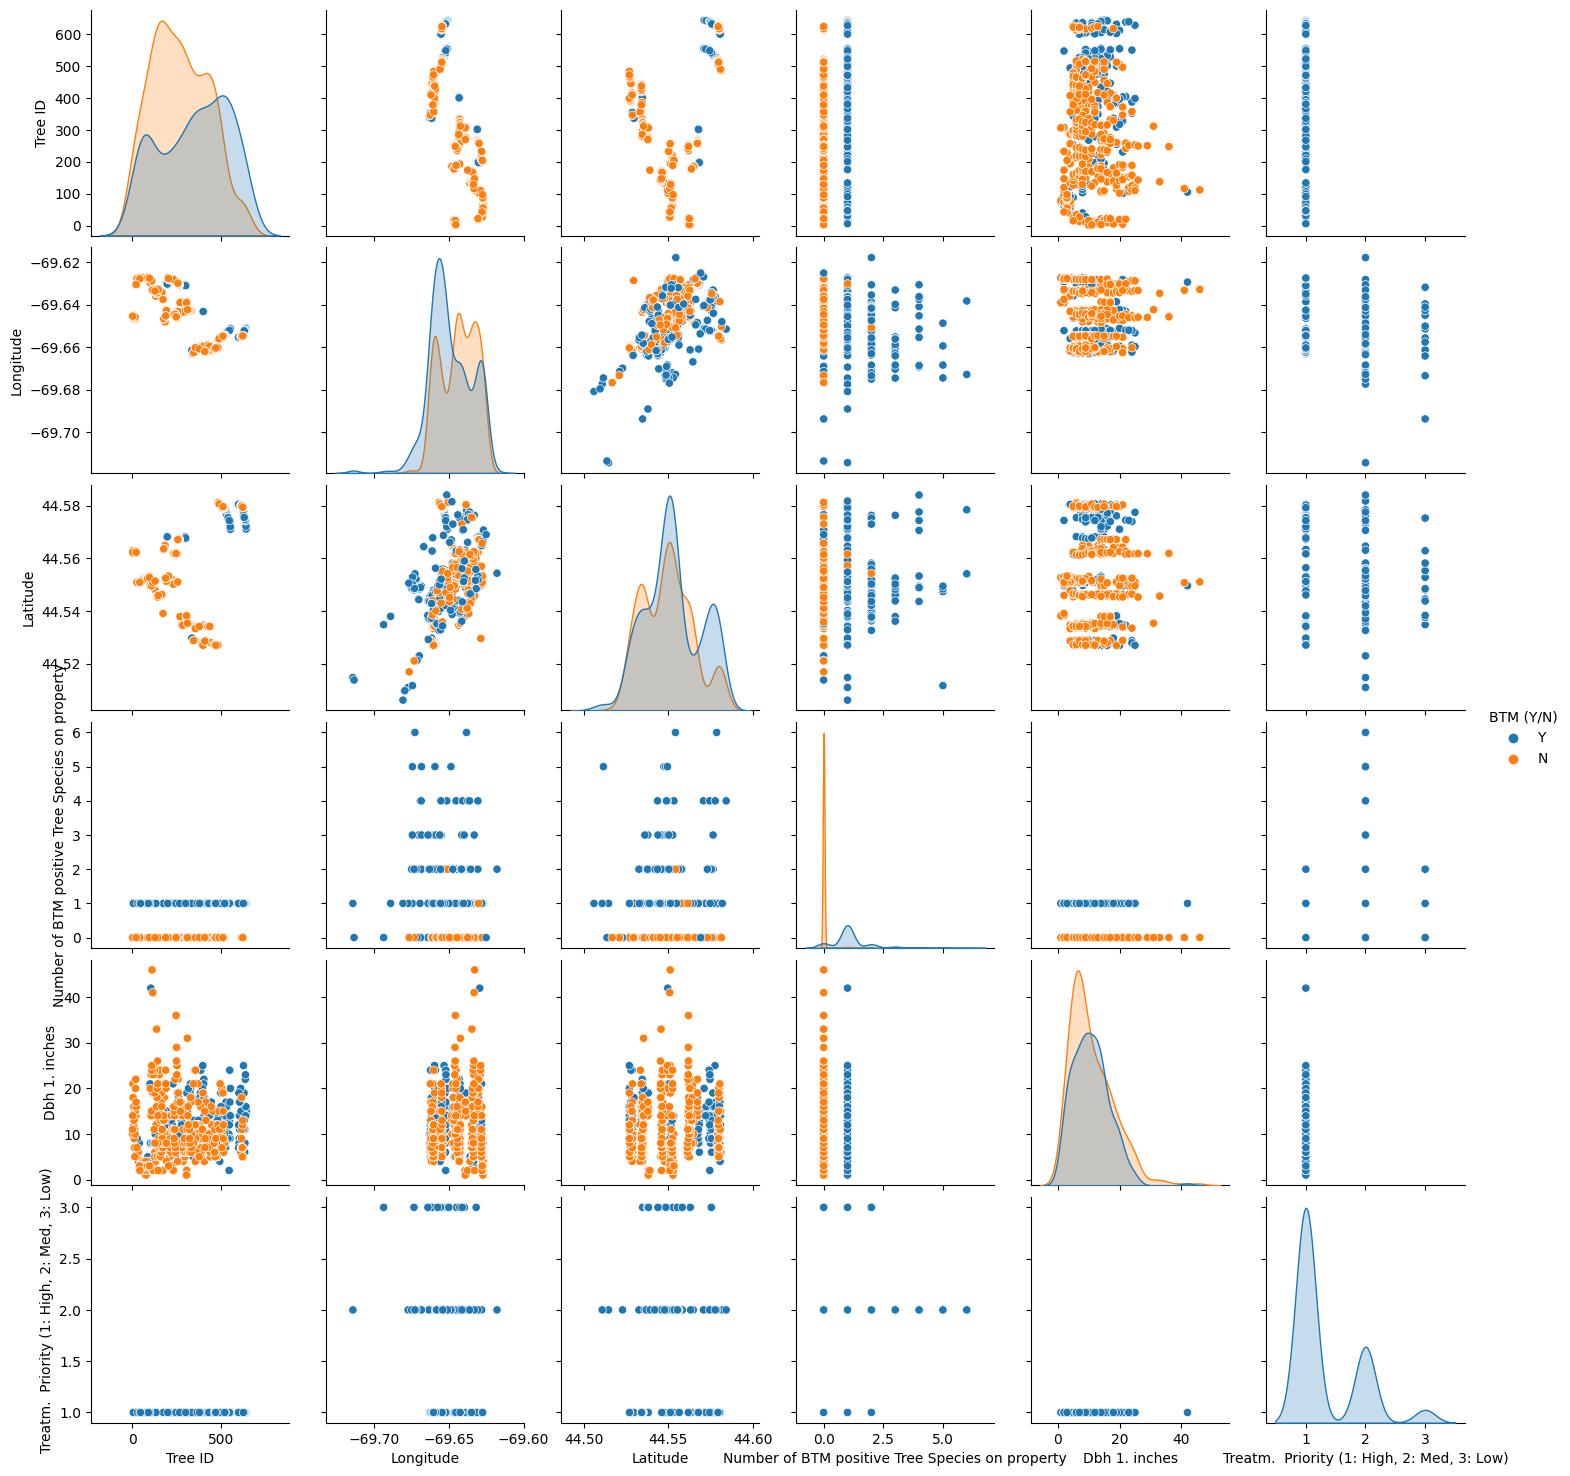

In [5]:
print("\nInspect Variable Correlations\n")
sns.pairplot(df, kind = "scatter", hue = 'BTM (Y/N)')


In [33]:
fig = px.scatter_mapbox(df, lat='Latitude', lon='Longitude')
fig.update_layout(mapbox_style="open-street-map")
fig.update_geos(fitbounds="locations")
fig.show()

NORMALIZING/ TRANSFORMING DATA

In [7]:
converted_df = pd.DataFrame(df)
for col in df.columns:
    if df[col].dtype == 'object':
        vals = {name: index for index, name in enumerate(df[col].unique())}
        converted_df[col] = df[col].apply(lambda x : vals[x])
    else:
        converted_df[col] = df[col]
display(converted_df.head())
display(df.head())

,Tree ID,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,130.0,-69.633445,44.551271,0,0,0,0,1.0,10.0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,101.0,-69.629734,44.549535,0,1,0,0,1.0,21.0,0,...,0,0,1,0,0,0,0,0,0,1.0
2,59.0,-69.627131,44.551959,1,0,0,0,1.0,4.0,0,...,0,0,1,1,0,0,0,1,1,1.0
3,105.0,-69.629361,44.549576,1,0,0,0,1.0,42.0,0,...,0,0,1,0,0,0,0,1,1,1.0
4,353.0,-69.662301,44.528730,2,0,0,0,1.0,24.0,0,...,0,0,1,0,0,0,0,1,1,1.0


,Tree ID,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,130.0,-69.633445,44.551271,0,0,0,0,1.0,10.0,0,...,0,0,0,0,0,0,0,0,0,1.0
1,101.0,-69.629734,44.549535,0,1,0,0,1.0,21.0,0,...,0,0,1,0,0,0,0,0,0,1.0
2,59.0,-69.627131,44.551959,1,0,0,0,1.0,4.0,0,...,0,0,1,1,0,0,0,1,1,1.0
3,105.0,-69.629361,44.549576,1,0,0,0,1.0,42.0,0,...,0,0,1,0,0,0,0,1,1,1.0
4,353.0,-69.662301,44.528730,2,0,0,0,1.0,24.0,0,...,0,0,1,0,0,0,0,1,1,1.0


FILLING IN NA

In [8]:
converted_df = converted_df.fillna(converted_df.median().round(1)).astype('float64')
display(converted_df.head())


,Tree ID,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,...,Dbh 5,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)"
0,130.0,-69.633445,44.551271,0.0,0.0,0.0,0.0,1.0,10.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,101.0,-69.629734,44.549535,0.0,1.0,0.0,0.0,1.0,21.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,59.0,-69.627131,44.551959,1.0,0.0,0.0,0.0,1.0,4.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
3,105.0,-69.629361,44.549576,1.0,0.0,0.0,0.0,1.0,42.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,353.0,-69.662301,44.528730,2.0,0.0,0.0,0.0,1.0,24.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0


ZScore

In [9]:
for col in ['Number of BTM positive Tree Species on property', 'Dbh 1. inches']:
    converted_df[col] = zscore(converted_df[col])

In [10]:
print("\nshape\n", converted_df.shape)
print("\ndtypes\n", converted_df.dtypes)
print("\nmissing values\n", converted_df.isnull().any())


shape
 (932, 22)

dtypes
 Tree ID                                                                      float64
Longitude                                                                    float64
Latitude                                                                     float64
Common Name                                                                  float64
Condition Class / Infestation Pattern                                        float64
List of Trees on  residential property                                       float64
BTM positive trees self reported  on residential property                    float64
Number of BTM positive Tree Species on property                              float64
Dbh 1. inches                                                                float64
Dbh 2                                                                        float64
Dbh 3                                                                        float64
Dbh 4                                 

PCA

In [11]:
pca = PCA(n_components=5)
pca.fit(converted_df)
print(pca.explained_variance_ratio_)
pca_df = pca.transform(converted_df)
print(pca_df.shape, pca_df.dtype)

[0.95827529 0.0300923  0.00689601 0.00260265 0.00128707]
(932, 5) float64


KM Clustering

In [12]:
km = KMeans(n_clusters=5)
km.fit(pca_df)
df['KMeans Labels'] = km.labels_
display(df.head())

,Tree ID,Longitude,Latitude,Common Name,Condition Class / Infestation Pattern,List of Trees on residential property,BTM positive trees self reported on residential property,Number of BTM positive Tree Species on property,Dbh 1. inches,Dbh 2,...,Dbh 6,Number Observed BTM Nests,Distance to Water (feet),Entry Source,BTM (Y/N),Interest in Help,Tree Type (Ornamental | Fruiting / Flowering | Bush),Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray),"Treatm. Priority (1: High, 2: Med, 3: Low)",KMeans Labels
0,130.0,-69.633445,44.551271,0,0,0,0,1.0,10.0,0,...,0,0,0,0,0,0,0,0,1.0,4
1,101.0,-69.629734,44.549535,0,1,0,0,1.0,21.0,0,...,0,1,0,0,0,0,0,0,1.0,1
2,59.0,-69.627131,44.551959,1,0,0,0,1.0,4.0,0,...,0,1,1,0,0,0,1,1,1.0,1
3,105.0,-69.629361,44.549576,1,0,0,0,1.0,42.0,0,...,0,1,0,0,0,0,1,1,1.0,1
4,353.0,-69.662301,44.528730,2,0,0,0,1.0,24.0,0,...,0,1,0,0,0,0,1,1,1.0,0


## Time For Decision Tree

Splitting the Data

(I filtered out data that appeared to be directly indicative of BTM infection. For example Treatment Priority)

In [66]:
X = converted_df.drop(['BTM (Y/N)', 'Treatm.  Priority (1: High, 2: Med, 3: Low)',
                      'Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)',
                      'Number of BTM positive Tree Species on property'], axis = 1).values
y = converted_df['BTM (Y/N)'].values
print('X shape: {}'.format(np.shape(X)))
print('y shape: {}'.format(np.shape(y)))

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.9, test_size = 0.1, random_state = 0)

X shape: (932, 18)
y shape: (932,)


In [82]:
dt = DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state = 1)
dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1)

[Text(0.3333333333333333, 0.875, 'Number Observed BTM Nests <= 23.5\nentropy = 0.994\nsamples = 838\nvalue = [457, 381]\nclass = Yes'),
 Text(0.16666666666666666, 0.625, 'entropy = 0.0\nsamples = 242\nvalue = [242, 0]\nclass = Yes'),
 Text(0.5, 0.625, 'Dbh 4 <= 10.5\nentropy = 0.943\nsamples = 596\nvalue = [215, 381]\nclass = No'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 304\nvalue = [0, 304]\nclass = No'),
 Text(0.6666666666666666, 0.375, 'Tree Type (Ornamental | Fruiting / Flowering | Bush) <= 3.5\nentropy = 0.832\nsamples = 292\nvalue = [215, 77]\nclass = Yes'),
 Text(0.5, 0.125, 'entropy = 0.0\nsamples = 161\nvalue = [161, 0]\nclass = Yes'),
 Text(0.8333333333333334, 0.125, 'entropy = 0.978\nsamples = 131\nvalue = [54, 77]\nclass = No')]

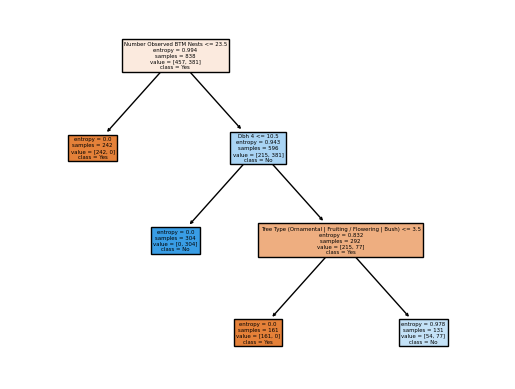

In [81]:
fn=converted_df.drop(['BTM (Y/N)', 'Treatm.  Priority (1: High, 2: Med, 3: Low)',
                      'Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)',
                      'Number of BTM positive Tree Species on property'], axis = 1).columns
cn= ['Yes', 'No']

tree.plot_tree(dt,
               feature_names = fn, 
               class_names=cn,
               filled = True)

Finding Feature Importance

In [70]:
for i, column in enumerate(converted_df.drop(['BTM (Y/N)', 'Treatm.  Priority (1: High, 2: Med, 3: Low)',
                      'Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)',
                      'Number of BTM positive Tree Species on property'], axis = 1)):
    print('Importance of feature {}:, {:.3f}'.format(column, dt.feature_importances_[i]))
    
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [dt.feature_importances_[i]]})
    
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index = True)
    except:
        final_fi = fi
        


Importance of feature Tree ID:, 0.000
Importance of feature Longitude:, 0.000
Importance of feature Latitude:, 0.000
Importance of feature Common Name:, 0.000
Importance of feature Condition Class / Infestation Pattern:, 0.000
Importance of feature List of Trees on  residential property:, 0.000
Importance of feature BTM positive trees self reported  on residential property:, 0.000
Importance of feature Dbh 1. inches:, 0.000
Importance of feature Dbh 2:, 0.000
Importance of feature Dbh 3:, 0.000
Importance of feature Dbh 4:, 0.453
Importance of feature Dbh 5:, 0.000
Importance of feature Dbh 6:, 0.000
Importance of feature Number Observed BTM Nests:, 0.384
Importance of feature Distance to Water (feet):, 0.000
Importance of feature Entry Source:, 0.000
Importance of feature Interest in Help:, 0.000
Importance of feature Tree Type (Ornamental | Fruiting / Flowering | Bush):, 0.163


In [71]:
print('Training Accuracy is: ', dt.score(X_train, y_train))
print('Testing Accuracy is: ', dt.score(X_test, y_test))

Training Accuracy is:  0.9355608591885441
Testing Accuracy is:  0.9468085106382979


Confusion Matrix Fx

In [72]:
def plot_confusion_matrix(cm, classes = None, title = 'Confusion Matrix'):
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Pred. label')

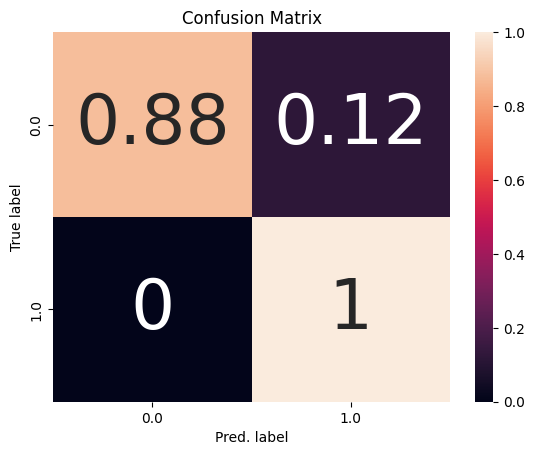

In [73]:
y_pred = dt.predict(X_train)

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=dt.classes_)

## Time for Random Forest

Training Accuracy is:  1.0
Testing Accuracy is:  0.9468085106382979


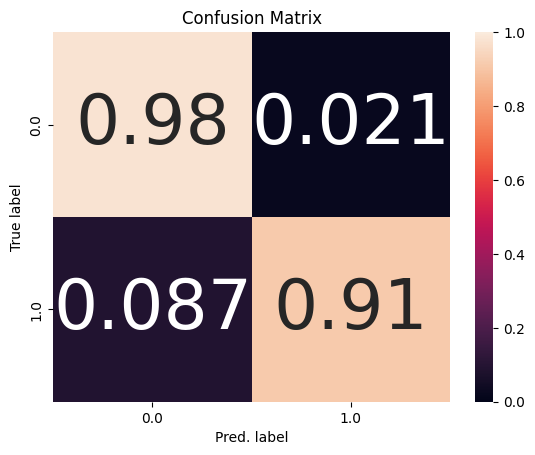

In [31]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

print('Training Accuracy is: ', rf.score(X_train, y_train))
print('Testing Accuracy is: ', rf.score(X_test, y_test))

cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:,np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_)

Tuning up the Hyperparameters

Classification accuracy on test set with max features = 1 and max_depth = None: 0.947
Classification accuracy on test set with max features = 1 and max_depth = 2: 0.830
Classification accuracy on test set with max features = 1 and max_depth = 3: 0.851
Classification accuracy on test set with max features = 1 and max_depth = 4: 0.957
Classification accuracy on test set with max features = 1 and max_depth = 5: 0.957
Classification accuracy on test set with max features = sqrt and max_depth = None: 0.957
Classification accuracy on test set with max features = sqrt and max_depth = 2: 0.872
Classification accuracy on test set with max features = sqrt and max_depth = 3: 0.957
Classification accuracy on test set with max features = sqrt and max_depth = 4: 0.979
Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.989
Classification accuracy on test set with max features = log2 and max_depth = None: 0.957
Classification accuracy on test set with max features = log2

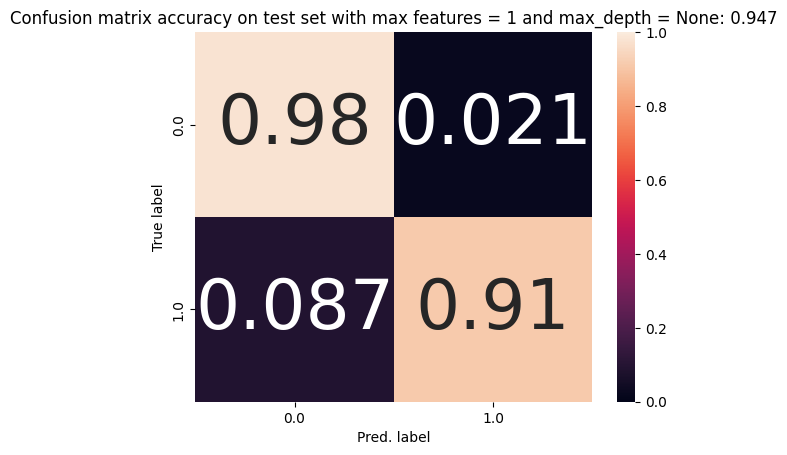

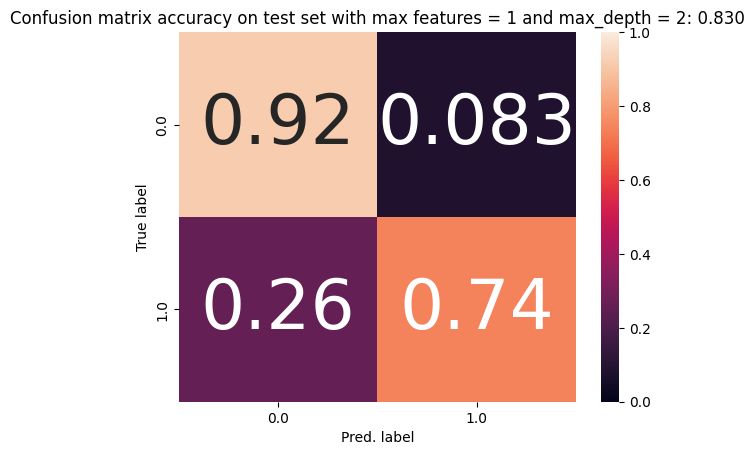

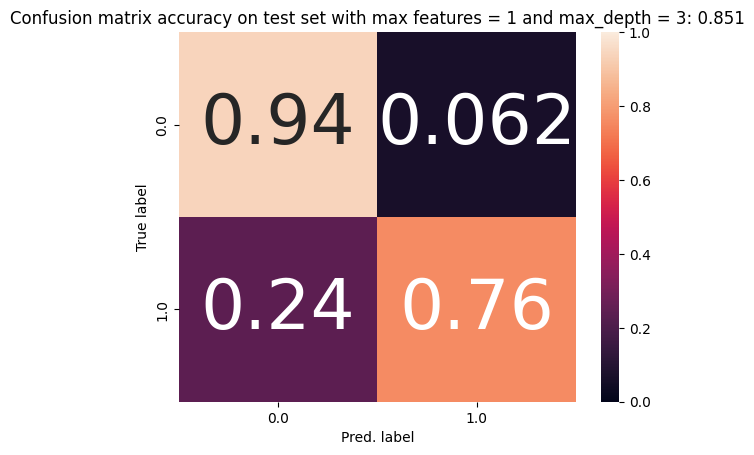

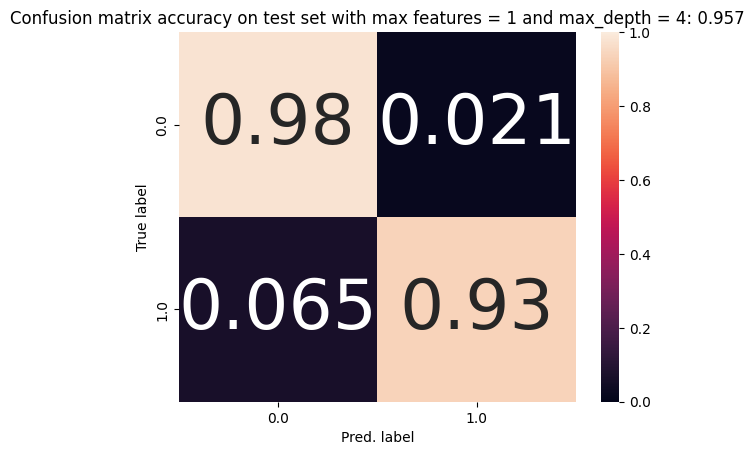

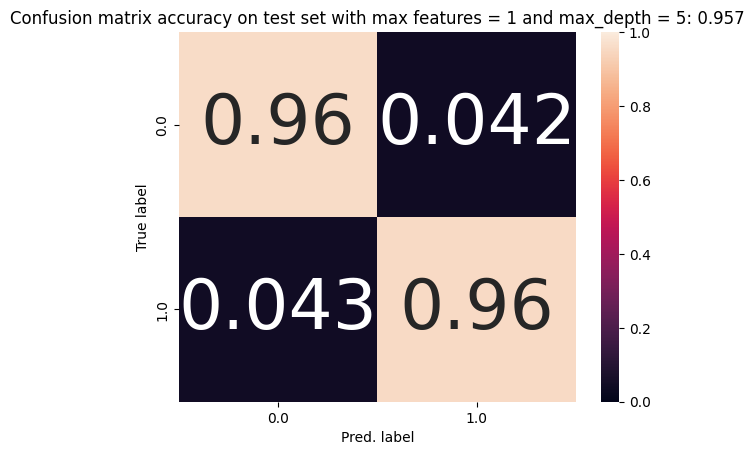

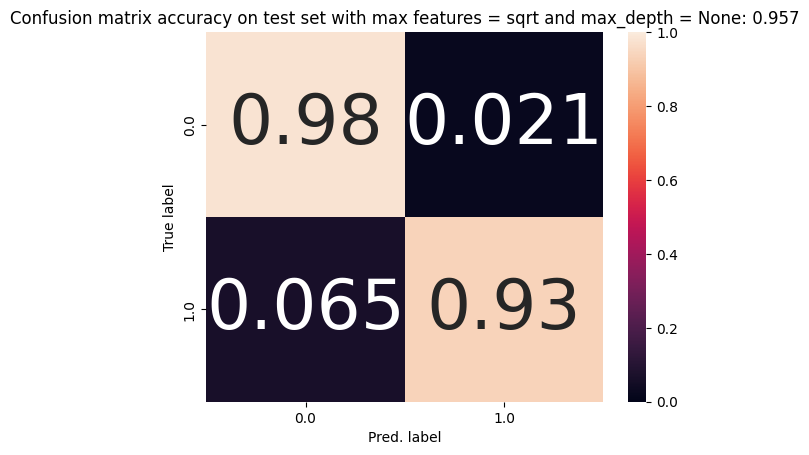

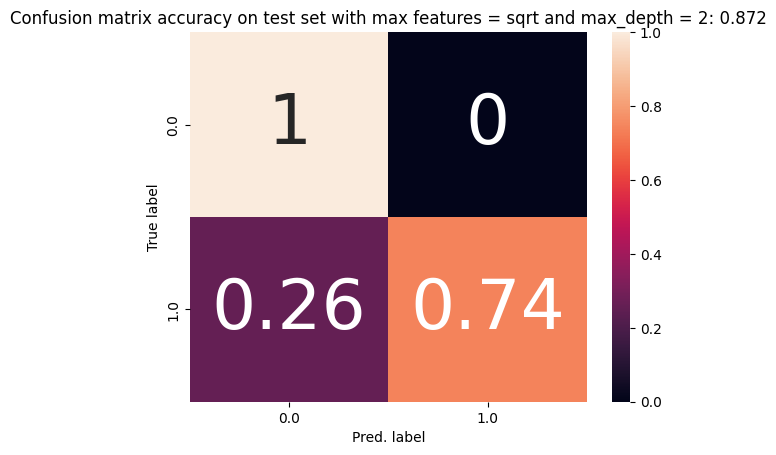

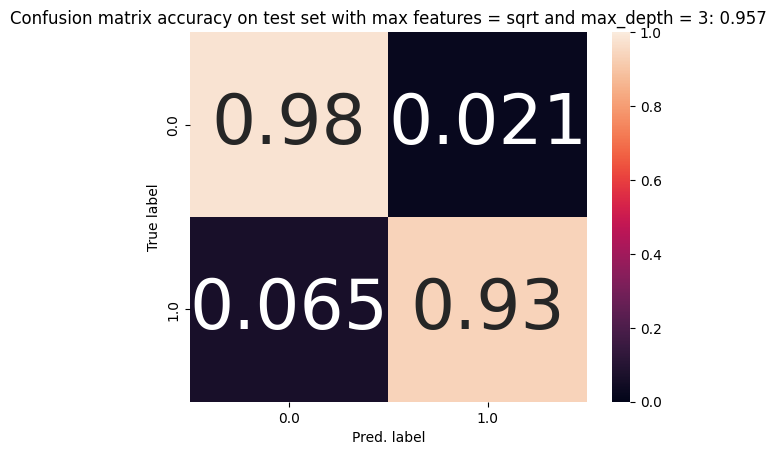

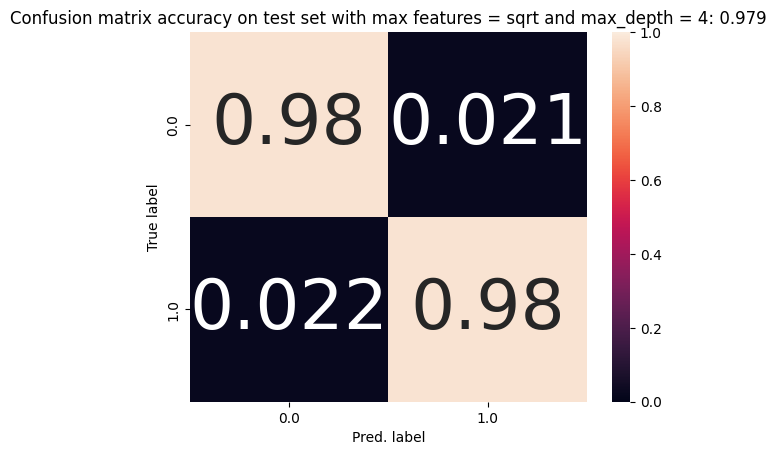

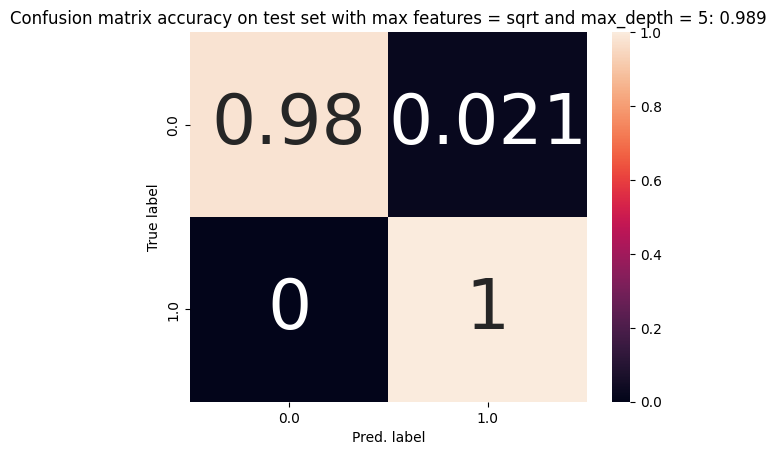

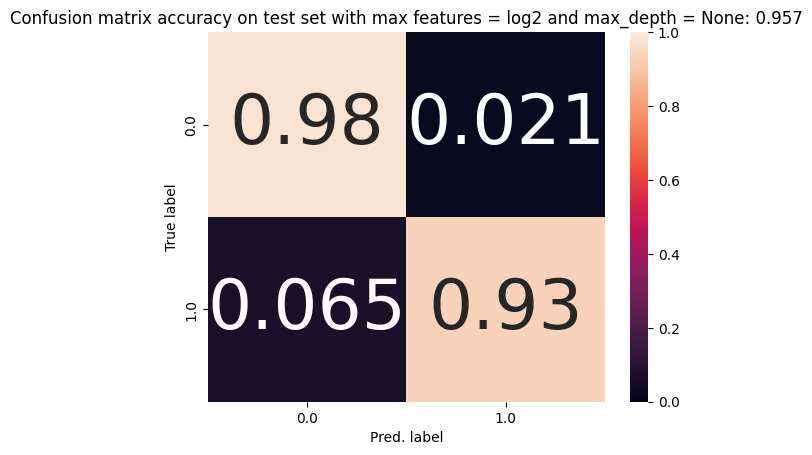

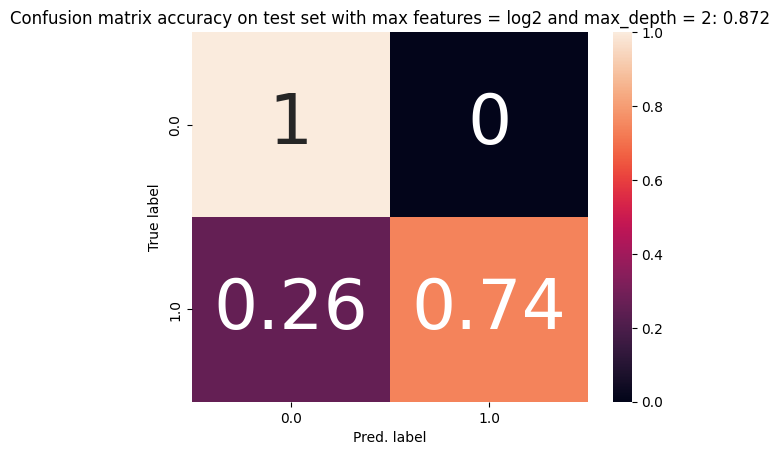

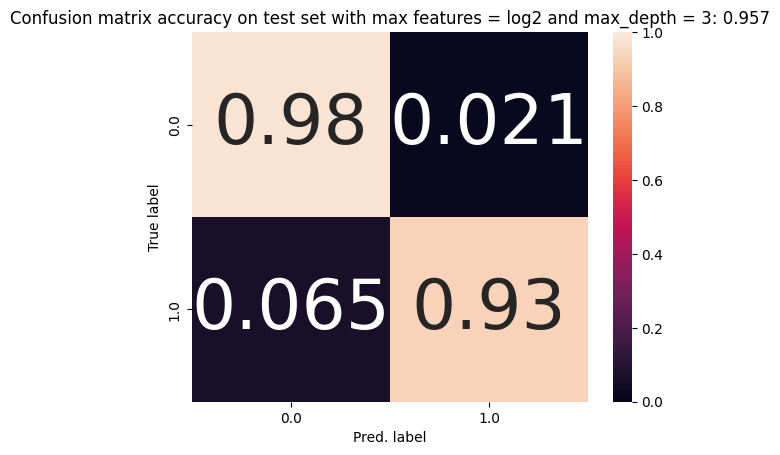

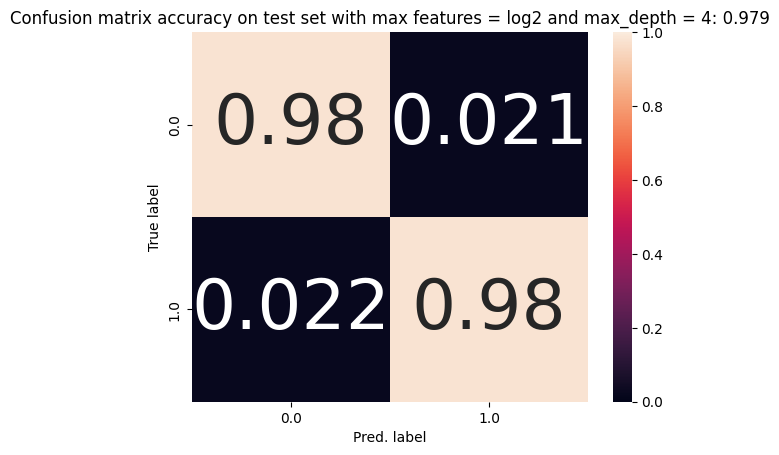

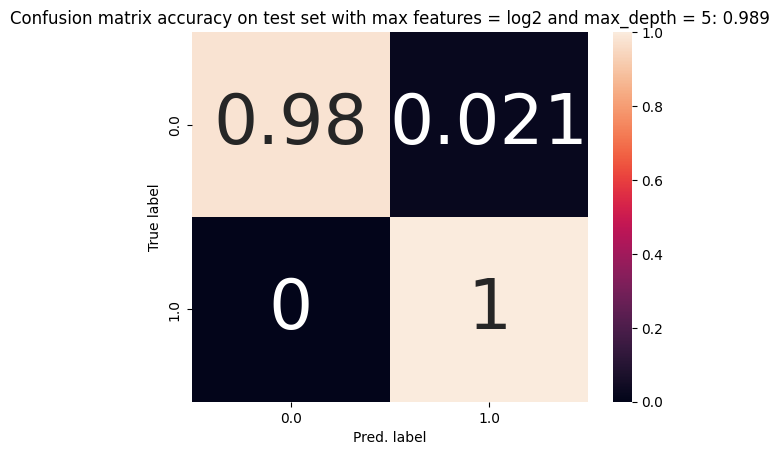

In [76]:
from itertools import product
n_estimators = 100
max_features = [1, 'sqrt', 'log2']
max_depths = [None, 2, 3, 4, 5]
for f, d in product(max_features, max_depths): 
    rf = RandomForestClassifier(n_estimators=n_estimators, 
                                criterion='entropy', 
                                max_features=f, 
                                max_depth=d, 
                                n_jobs=2,
                                random_state=1337)
    rf.fit(X_train, y_train)
    prediction_test = rf.predict(X=X_test)
    print('Classification accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))
    cm = confusion_matrix(y_test, prediction_test)
    cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
    plt.figure()
    plot_confusion_matrix(cm_norm, classes=rf.classes_,
    title='Confusion matrix accuracy on test set with max features = {} and max_depth = {}: {:.3f}'.format(f, d, accuracy_score(y_test,prediction_test)))



**Best Hyperparameters:**

- Classification accuracy on test set with max features = sqrt and max_depth = 5: 0.989
- Classification accuracy on test set with max features = log2 and max_depth = 5: 0.989

**So, here is the best forest:**

Accuracy: 0.9680851063829787


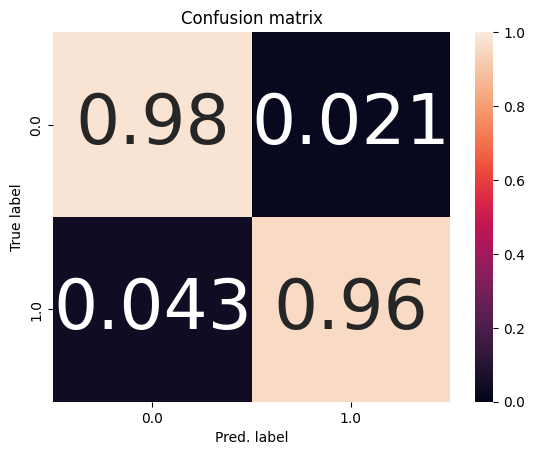

In [49]:
rf = RandomForestClassifier(n_estimators=100, 
                                criterion='entropy', 
                                max_features='sqrt', 
                                max_depth=5)
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)
print('Accuracy: ' + str(accuracy_score(y_test,prediction_test)))
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm/cm.sum(axis=1)[:, np.newaxis]
plt.figure()
plot_confusion_matrix(cm_norm, classes=rf.classes_,
title='Confusion matrix')



**Visualizing some trees**

(the first 5)

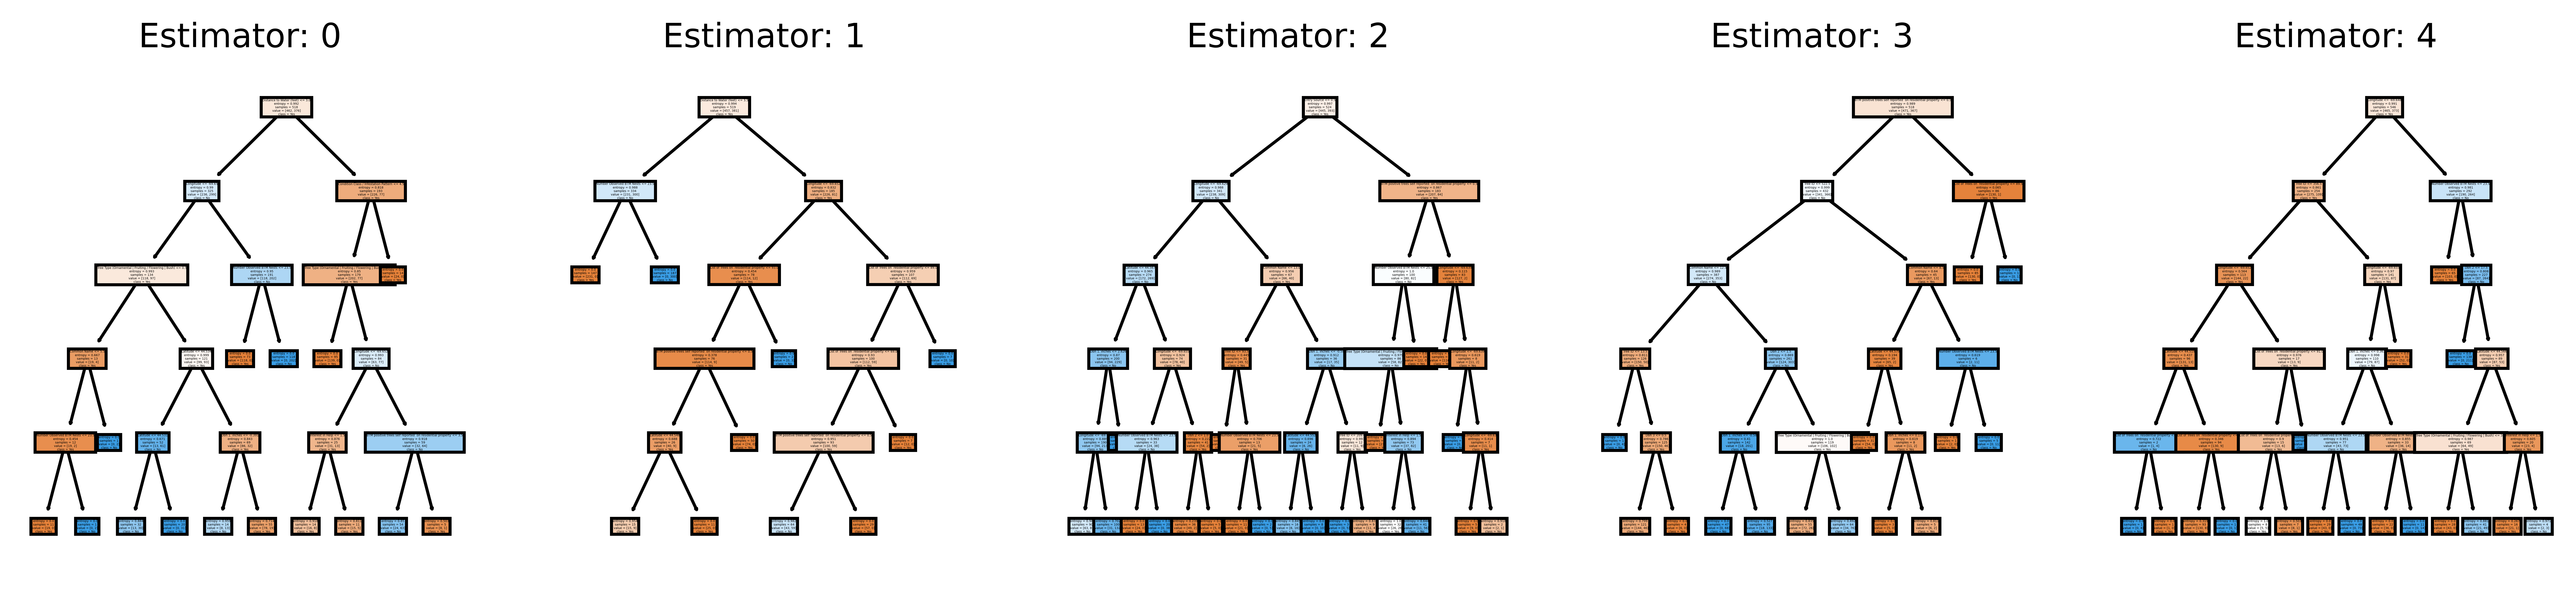

In [80]:
fn=converted_df.drop(['BTM (Y/N)', 'Treatm.  Priority (1: High, 2: Med, 3: Low)',
                      'Proposed Treatment Type (Insert/Injection; Manual Removal; Organic Spray)',
                      'Number of BTM positive Tree Species on property'], axis = 1).columns
cn= ['Yes', 'No']
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (15,3), dpi=1000)
for index in range(0, 5):
    tree.plot_tree(rf.estimators_[index],
                   feature_names = fn, 
                   class_names=cn,
                   filled = True,
                   ax = axes[index]);

    axes[index].set_title('Estimator: ' + str(index), fontsize = 11)
fig.savefig('Btm_Rf_5Trees.png')

Credits: 
- I referenced Amanda's sample code for data preperation and usage of random forest. 
- I also referenced Data 360 YP's youtube video discussing random forests. [Link](https://www.youtube.com/watch?v=aXw12xFVxwg&t=253s)
- As well as this stack overflow thread on creating tree visualizations. [Link](https://stackoverflow.com/questions/40155128/plot-trees-for-a-random-forest-in-python-with-scikit-learn)

